In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("data_eda.csv")
# choose the relevant columns


In [2]:
df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [3]:
df_model = df[[
    "avg_salary",
    "Rating",
    "Size",
    "Type of ownership",
    "Industry",
    "Sector",
    "Revenue",
    "num_comp",
    "hourly",
    "employer_provided",
    "job_state",
    "same_state",
    "age",
    "python_yn",
    "spark",
    "aws",
    "excel",
    "job_simp",
    "seniority",
    "desc_len",
]]


In [4]:
# get dummy data
df_dum = pd.get_dummies(df_model)
df_dum

# train test split

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark,aws,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,84.5,3.9,3,0,0,0,190,0,0,1,...,0,0,0,0,0,0,1,0,0,1
738,102.5,4.4,3,0,0,0,14,1,1,1,...,0,1,0,0,0,0,0,0,0,1
739,73.5,2.6,0,0,0,1,36,0,0,0,...,0,0,0,0,0,0,1,0,1,0
740,127.5,3.2,0,0,0,0,-1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split

X = df_dum.drop("avg_salary", axis=1)
y = df_dum.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# multiple linear regression

In [6]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)


In [7]:
model.fit().summary()


.497      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1362      3.878      1.582      0.114      -1.481      13.753
Size_201 to 500 employees                             2.2568      3.873      0.583      0.560      -5.350       9.864
Size_5001 to 10000 employees                         -3.8766      5.440     -0.713      0.476     -14.561       6.808
Size_501 to 1000 employees                            2.1829      4.059      0.538      0.591      -5.790      10.155
Size_51 to 200 employees                              4.2001      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8850     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6113      8.629      1.577      0.115      -3.335      30.558
Type of ownership_College / University                6.4226     17.739      0.362      0.717     -28.415      41.260
Type of ownership_Company - Private                   8.5961      5.239      1.641      0.101      -1.693      18.885
Type of ownership_Company - Public                   13.2838      5.699      2.331      0.020       2.092      24.476
Type of ownership_Government                        -15.3361     15.289     -1.003      0.316     -45.363      14.690
Type of ownership_Hospital                           -7.1449      9.965     -0.717      0.474     -26.715      12.425
Type of ownership_Nonprofit Organization             -9.8081      6.711     -1.461      0.144     -22.988       3.372
Type of ownership_Other Organization                 -5.9776     14.342     -0.417      0.677     -34.145      22.190
Type of ownership_School / School District           -5.9877     23.790     -0.252      0.801     -52.711      40.735
Type of ownership_Subsidiary or Business Segment     12.7968      6.928      1.847      0.065      -0.809      26.403
Type of ownership_Unknown                            33.1643     28.609      1.159      0.247     -23.021      89.350
Industry_-1                                           5.8348      7.935      0.735      0.462      -9.749      21.418
Industry_Accounting                                   2.5126     13.486      0.186      0.852     -23.972      28.998
Industry_Advertising & Marketing                     11.6598      5.976      1.951      0.051      -0.076      23.395
Industry_Aerospace & Defense                          5.5848      3.109      1.796      0.073      -0.522      11.691
Industry_Architectural & Engineering Services       -32.4290     15.935     -2.035      0.042     -63.725      -1.133
Industry_Auctions & Galleries                         9.2579     22.878      0.405      0.686     -35.673      54.188
Industry_Banks & Credit Unions                      -16.9696      8.047     -2.109      0.035     -32.773      -1.166
Industry_Beauty & Personal Accessories Stores        15.4350     21.561      0.716      0.474     -26.910      57.780
Industry_Biotech & Pharmaceuticals                    6.4280      2.045      3.144      0.002       2.413      10.443
Industry_Brokerage Services                          28.1129     15.522      1.811      0.071      -2.371      58.597
Industry_Colleges & Universities                     10.9589     12.989      0.844      0.399     -14.551      36.469
Industry_Computer Hardware & Software                -0.9258      3.250     -0.285      0.776      -7.308       5.457
Industry_Construction                               -15.5552     10.562     -1.473      0.141     -36.297       5.187
Industry_Consulting                                  12.9352      5.900      2.192      0.029       1.347      24.523
Industry_Consumer Product Rental                     -2.4434     13.017     -0.188      0.851     -28.008      23.121
Industry_Consumer Products Manufacturing             13.8230      9.857      1.402      0.161      -5.536      33.182
Industry_Department, Clothing, & Shoe Stores          4.7499     1

In [8]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [9]:
# np.mean(
#     cross_val_score(lm,
#                     X_train,
#                     y_train,
#                     scoring="neg_mean_absolute_error",
#                     cv=3))

cross_val_score(lm, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)

# lasso regression

array([-2.01637231e+01, -5.38614635e+08, -2.24262496e+01])

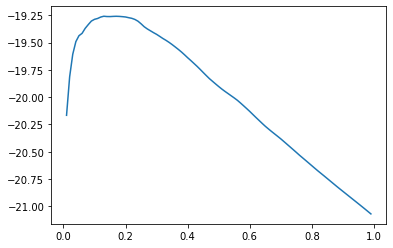

In [10]:
# lm_1 = Lasso(alpha=0.13)
# lm_1 = Lasso(alpha=0.13)
# lm_1.fit(X_train, y_test)
# np.mean(
#     cross_val_score(lm_1,
#                     X_train,
#                     y_train,
#                     scoring="neg_mean_absolute_error",
#                     cv=3))
# alpha = []
# error = []

# for i in range(1, 100):
#     alpha.append(i / 100)
#     lm_1 = Lasso(alpha=(i / 100))
#     error.append(
#         np.mean(
#             cross_val_score(lm_1,
#                             X_train,
#                             y_train,
#                             scoring="neg_mean_absolute_error",
#                             cv=3)))

# plt.plot(alpha, error)

lm_l = Lasso(alpha=0.13)
lm_l.fit(X_train, y_train)
np.mean(
    cross_val_score(lm_l,
                    X_train,
                    y_train,
                    scoring="neg_mean_absolute_error",
                    cv=3))

alpha = []
error = []

for i in range(1, 100):
    alpha.append(i / 100)
    lml = Lasso(alpha=(i / 100))
    error.append(
        np.mean(
            cross_val_score(lml,
                            X_train,
                            y_train,
                            scoring="neg_mean_absolute_error",
                            cv=3)))

plt.plot(alpha, error)


In [11]:
err = tuple(zip(alpha, error))

df_err = pd.DataFrame(err, columns=["alpha", "error"])

df_err[df_err.error == max(df_err.error)]

# random forest

,alpha,error
12,0.13,-19.257798


In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

np.mean(
    cross_val_score(rf,
                    X_train,
                    y_train,
                    scoring="neg_mean_absolute_error",
                    cv=3))

# tune models GridSearchCV
# this is the tuning part, using grid search as mentioned above

-15.07316989693893

In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators": range(10, 300, 10),
    "criterion": (
        "mse",
        "mae",
    ),
    "max_features": ("auto", "sqrt", "log2"),
}


In [14]:
gs = GridSearchCV(rf, parameters, scoring="neg_mean_absolute_error", cv=3)
gs.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [15]:
gs.best_score_

-14.86520150746039

In [16]:
gs.best_estimator_

# test end samples

RandomForestRegressor()

In [17]:
# tpred_lm = lm.predict(X_train, y_train)
# tpred_lm_1 = lm_1.predict(X_train, y_train)

tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)


In [18]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, tpred_lm)


18.855189990211073

In [19]:
mean_absolute_error(y_test, tpred_lml)


19.665303712749914

In [20]:
mean_absolute_error(y_test, tpred_rf)


11.06711409395973

In [21]:

mean_absolute_error(y_test, (tpred_lm + tpred_rf) / 2)


14.288918256292078

In [22]:
((tpred_lm + tpred_rf) / 2)


array([112.64883587,  51.0925    , 136.832039  , 117.03824711,
       154.2156129 , 130.25133829, 137.47594263,  40.3977616 ,
        50.30988411,  75.23527854, 166.43890355,  69.49178721,
       112.9938564 , 124.49110212,  70.04734293, 140.30314744,
        64.15386471,  67.30715875, 115.43505598,  93.03016081,
       105.59001663, 128.21412037, 149.8529419 , 113.29549576,
       142.68937072, 104.9514857 ,  73.15716275, 142.13478149,
        99.45361412, 106.16627822,  81.35597038,  53.15235826,
       133.38386526, 110.10433966, 104.6790281 ,  88.62079793,
        80.78063006, 112.38897965,  64.67819352, 118.58643893,
       181.933436  , 115.28115487,  86.42332615,  91.14246331,
       157.04388226,  86.6540411 , 144.64141605, 121.13794817,
       138.02312051,  95.33432121, 124.8571648 ,  99.87142783,
        89.21512187, 106.72427088,  91.8161833 , 125.80833047,
        86.42332615,  79.89010637, 203.35663003, 138.17656199,
       120.72206334, 102.60940114, 119.12202063, 142.59

In [25]:
# pickling the model
import pickle

pickl = {"model": gs.best_estimator_}
pickle.dump(pickl, open("model_file" + ".p", "wb"))


In [26]:
file_name = "model_file.p"
with open(file_name, "rb") as pickled:
    data = pickle.load(pickled)
    model = data["model"]


In [28]:
list(X_test.iloc[1, :])

[3.6,
 0.0,
 0.0,
 0.0,
 1.0,
 34.0,
 0.0,
 0.0,
 0.0,
 1.0,
 4608.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,


In [30]:
X_test.iloc[1, :].values

array([3.600e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.400e+01,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.608e+03, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [31]:
model.predict(X_test.iloc[1, :].values.reshape(1, -1))


array([53.685])